# SMS Spam Classifier: NLP using Naive Bayes

**Objectives:**

- Conduct a simple Exploratory Data Analysis (EDA)
- Convert text to numerical data
- Save processed data



## Imports

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##  Load data

In [2]:
# load data
path = '~/workspace/data-science/my-projects/SMS-Spam-Classifier-App-master/ham-or-spam-nb-classifier/data/interim/'

df = pd.read_csv(path + 'spam.csv', delimiter=',', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# renaming columns
df = df.rename(columns = {'v1': 'label', 'v2': 'message'})
# Dropping columns:  Unnamed: 2, Unnamed: 3 and Unnamed: 4
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Initial Exploratory Data Analsis (EDA)

In [4]:
# checking for count, unique, top and freq
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
# Number of observations in each label spam and ham
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

The ratio of the inbalanced classes is 747/4825 = 0.1548 Imbalanced classes may not be a problem if the dataset is big enough. Sample size plays a role in determining how good the model is.

In [6]:
# add a new column 'length' to check how long each text message is
df['length'] = df['message'].apply(len)
df.head()


,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


The labels are categorical and text values.  We need to convert them to numerical.

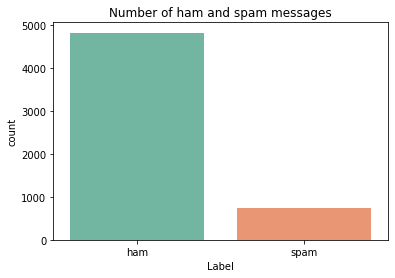

In [7]:
# show counts label observations
labels = df.label
# count plot on single categorical variable
sns.countplot(x=labels,  data=df, palette = "Set2")
plt.xlabel('Label')
plt.title('Number of ham and spam messages')
# show that plot
plt.show();


The class distribution resembles an imbalance ratio.  This could lead to a misclassification on the spam class.

In [8]:
#  counting our labels and checking for fequency
df.groupby('label').describe()


length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

There is a ham text message of 910 length?  Amazing!!!!   let's see it.

In [9]:
df[df.length == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

## Convert labels to numerical values

In [10]:
# ordinal encoding using map to pass values to ham == 0 and spam == 1
df.loc[:,'label'] = df.label.map({'ham': 0, 'spam': 1})
print(df.shape)
df.head()


(5572, 3)


,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
# Check for the percentage of missing values
df.isnull().mean()


label      0.0
message    0.0
length     0.0
dtype: float64

It seems there isn't any missing values.  We can save our data file.

### Saving our ready to use dataset into a csv file

In [12]:
# Saving our ready to use dataset into a csv file

df.to_csv("../data/processed/spam_processed.csv", index=False)


A basic EDA was conducted and managed to clean the data to be ready for further processes.